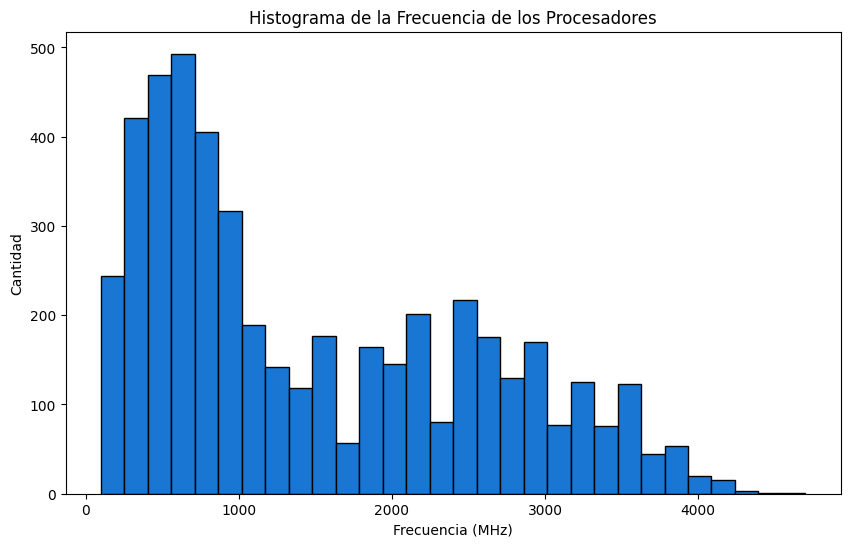

<Figure size 1000x600 with 0 Axes>

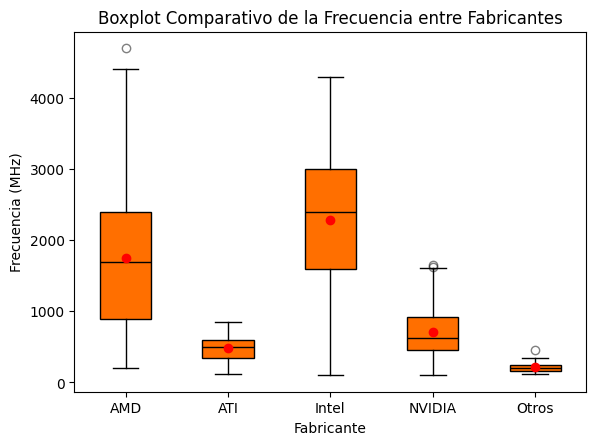

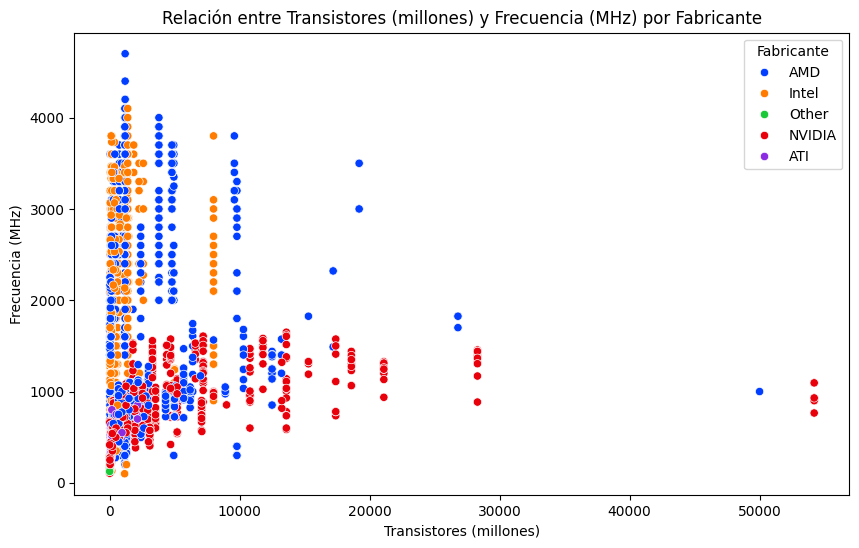

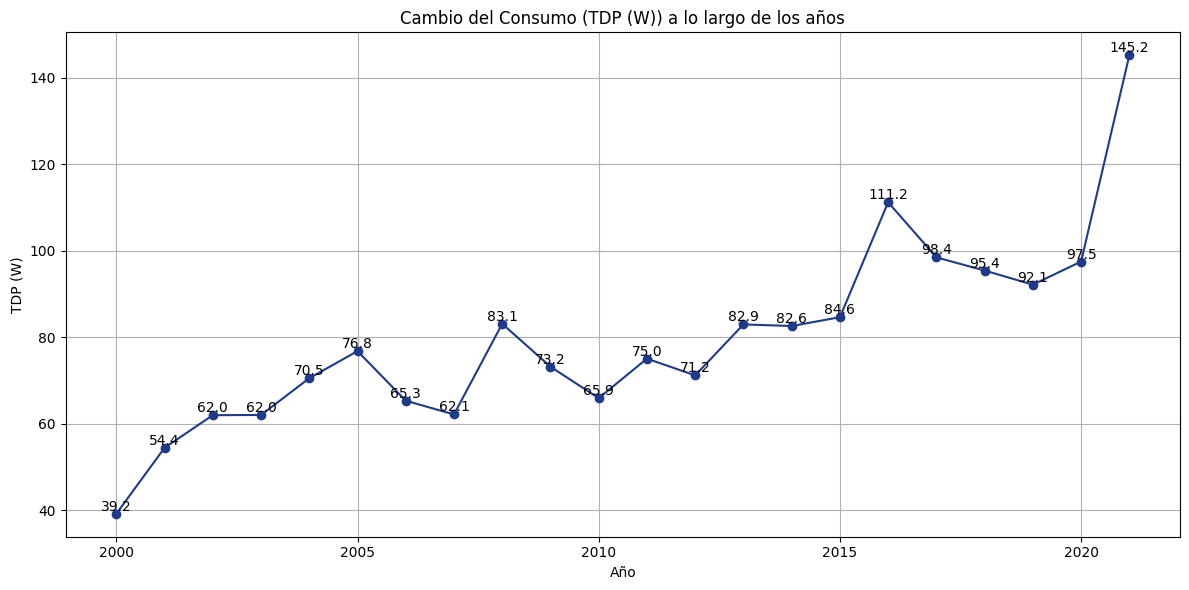

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as seab

# Cargar el archivo
df = pd.read_csv('chip_dataset.csv')

# Limpiamos columna de frecuencia
df['Freq (MHz)'] = pd.to_numeric(df['Freq (MHz)'], errors='coerce')

# Creamos columna de grupo, usando un condicional para evaluar los valores v en el dataframe Vendor
df['Grupo'] = ['AMD' if isinstance(v, str) and 'AMD' in v else
               'Intel' if isinstance(v, str) and 'Intel' in v else
               'NVIDIA' if isinstance(v, str) and 'NVIDIA' in v else
               'ATI' if isinstance(v, str) and 'ATI' in v else
               'Otros' for v in df['Vendor']]

#Agrupamos usando el Grupo que recien creamos y sacamos y calculamos estadísticas
tabla = df.groupby('Grupo')['Freq (MHz)'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
])
tabla['rango'] = tabla['max'] - tabla['min']

# Renombramos columnas para español
tabla = tabla.rename(columns={
    'count': 'Cantidad',
    'mean': 'Promedio',
    'median': 'Mediana',
    'std': 'Desviación estándar',
    'min': 'Mínimo',
    'max': 'Máximo',
    'rango': 'Rango'
})
tabla = tabla.sort_values(by='Promedio', ascending=False)


# Histograma de la frecuencia de los procesadores
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df['Freq (MHz)'].dropna(), bins=30, color='#1976D2', edgecolor='black')
plt.title('Histograma de la Frecuencia de los Procesadores')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Cantidad')

# Boxplot comparativo de la frecuencia entre fabricantes
plt.figure(figsize=(10,6))
df.boxplot(column='Freq (MHz)', by='Grupo', grid=False, patch_artist=True, showmeans=True,
           boxprops=dict(facecolor='#FF6F00', color='black'),
           medianprops=dict(color='black'),
           meanprops=dict(marker='o', markerfacecolor='r', markeredgecolor='r'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', color='green', alpha=0.5))
plt.title('Boxplot Comparativo de la Frecuencia entre Fabricantes')

plt.suptitle('')  # Eliminar el título automático de Pandas
plt.xlabel('Fabricante')
plt.ylabel('Frecuencia (MHz)')
plt.show()

# Scatterplot que relacione Transistors (million) y Freq (MHz)
plt.figure(figsize=(10,6))
seab.scatterplot(data=df, x='Transistors (million)', y='Freq (MHz)', hue='Vendor', palette='bright')
plt.title('Relación entre Transistores (millones) y Frecuencia (MHz) por Fabricante')
plt.xlabel('Transistores (millones)')
plt.ylabel('Frecuencia (MHz)')
plt.legend(title='Fabricante')
plt.show()

# Gráfico narrativo de línea que muestra cómo ha cambiado el consumo (TDP (W)) a lo largo de los años (Release Date)
# agrupar por año y calcular el promedio del TDP (W)

# Convertir 'Release Date' a datetime
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

df['Año'] = df['Release Date'].dt.year
tdp_por_año = df.groupby('Año')['TDP (W)'].mean().dropna()

# Crear el gráfico de líneas
plt.figure(figsize=(12,6))
plt.plot(tdp_por_año.index, tdp_por_año.values, marker='o', linestyle='-', color='#1E3A8A')
plt.title('Cambio del Consumo (TDP (W)) a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('TDP (W)')

# Añadir etiquetas a cada punto de datos
for x, y in zip(tdp_por_año.index, tdp_por_año.values):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()


